## 🏡📈 Analyse Approfondie des Prix Immobiliers : Défis et Solutions en Régression

#### LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data

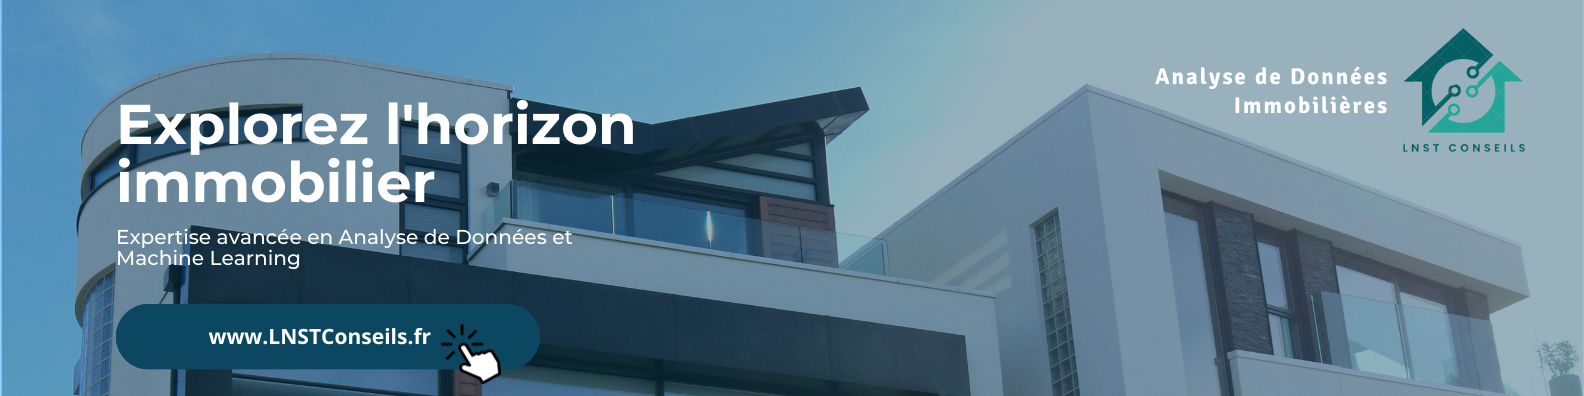

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

## Etape 2 - Création de nouvelles variables

1. [Introduction](#introduction)
1. [Création de nouvelles variables](#creation)

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.
    


- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.
        


- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.
    

    
- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

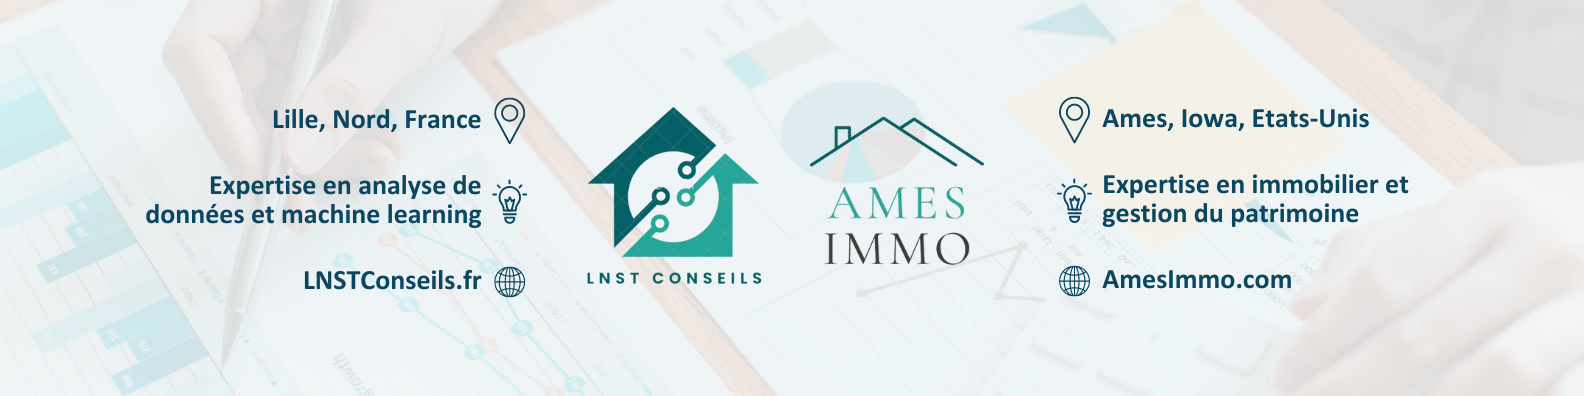

📝 **Comment naviguer dans ce notebook :**

Dans ce notebook, vous pouvez naviguer efficacement en suivant ces étapes simples :

- **Consultez les _définitions statistiques_ (📚) :** Les définitions sont données de manière fonctionnelle pour clarifier les concepts clés utilisés dans l'analyse. Comprendre ces définitions est crucial pour une bonne interprétation des résultats statistiques et pour une application appropriée des techniques d'analyse des données.
<br><br/>
- **Lisez attentivement les _observations_ (💡) :** Ces remarques expliquent les décisions statistiques ou fonctionnelles prises tout au long de l'étude. Elles éclairent sur les raisons pour lesquelles certaines approches ont été privilégiées et guident l'utilisateur dans le processus d'analyse en clarifiant des points spécifiques.
<br><br/>
- **Analysez les _hypothèses_ (❓) :** Les hypothèses sont des propositions ou des suppositions basées sur nos observations des données.


# Partie 2 - Création de nouvelles variables <a class="anchor"  id="creation"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

La *feature engineering* se concentre sur l'optimisation des caractéristiques des données pour améliorer les performances des modèles. Deux aspects clés de cette pratique incluent le regroupement de variables et la création de nouvelles variables.
    
- Le **regroupement de variables** consiste à combiner, transformer ou simplifier des caractéristiques existantes pour réduire la complexité et améliorer la pertinence pour le modèle. Par exemple, dans le contexte immobilier, la fusion de plusieurs caractéristiques liées à la superficie d'une maison peut simplifier la représentation tout en maintenant l'information essentielle.
- La **création de nouvelles variables** englobe le développement de caractéristiques supplémentaires à partir des données existantes, offrant ainsi une perspective plus riche au modèle. Ces pratiques, souvent itératives, visent à enrichir la représentation des données, conduisant ainsi à des modèles plus performants et plus précis.
    
</div>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Cette section concerne l'importation de diverses bibliothèques Python ainsi que de l'importation de la base de données finale de la première étape.

</div>

In [ ]:
# Importation des bibliothèques
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
data_etape3 = pd.read_csv('data_etape2.csv')
data_etape3.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite,annee_indice_prix_logements,moyenne_indice_prix_logements,Latitude,Longitude,Coordonnées
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2007-12-31,387.4317,300.1962,471.7739,2007,2007,167.6625,42.041807,-93.649090,"42.04180709605563, -93.6490898164628"
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,2006-12-31,279.7815,285.7397,479.3354,2006,2006,163.4250,42.028001,-93.607129,"42.02800106252608, -93.60712917413362"
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.047933,-93.648030,"42.04793340295536, -93.64802984529771"


In [ ]:
# Aperçu du dataset
data_etape3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   superficieEtage1                  2903 non-null   int64  
 1   superficieEtage2                  2903 non-null   int64  
 2   superficieRallonge3Saisons        2903 non-null   int64  
 3   typeAlleeAcces                    2903 non-null   object 
 4   nbChambres                        2903 non-null   int64  
 5   typeBatiment                      2903 non-null   object 
 6   conditionSousSol                  2903 non-null   object 
 7   expositionSousSol                 2903 non-null   object 
 8   superficieFinieSousSol1           2903 non-null   float64
 9   superficieFinieSousSol2           2903 non-null   float64
 10  qualiteSurfaceFinieSousSol1       2903 non-null   object 
 11  qualiteSurfaceFinieSousSol2       2903 non-null   object 
 12  nbSall

### Variable "ancienneteRenovation"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Nous allons créer une nouvelle variable "ancienneteRenovation" qui indique depuis combien d'années un logement a été rénové.

Nous partons du principe que les logements rénovés récemment sont susceptibles d'avoir un prix de vente plus élevé.

</div>

In [ ]:
# Définition d'une fonction pour calculer l'ancienneté de la rénovation
def calculer_anciennete(row):
    if pd.notnull(row['anneeRenovation']):
        return row['anneeVente'] - row['anneeRenovation']
    else:
        return "Pas de rénovation"

# Appliquer la fonction à chaque ligne du DataFrame
data_etape3['ancienneteRenovation'] = data_etape3.apply(lambda row: calculer_anciennete(row), axis=1)

In [ ]:
# Test
print(data_etape3[['anneeRenovation', 'anneeVente', 'ancienneteRenovation']].head(10))

   anneeRenovation  anneeVente  ancienneteRenovation
0             2003        2008                     5
1             1976        2007                    31
2             2002        2008                     6
3             1970        2006                    36
4             2000        2008                     8
5             1995        2009                    14
6             2005        2007                     2
7             1973        2009                    36
8             1950        2008                    58
9             1950        2008                    58


### Variable "ancienneteConstruction"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Nous allons créer une nouvelle variable "ancienneteConstruction" qui indique  le nombre d'années d'existence d'un logement.

Nous considérons que le nombre d'années écoulées depuis la construction d'un logement est un indicateur important susceptible d'influer sur son prix.  En effet, cela peut être pertinent car la date de construction peut influencer la qualité de la construction, les normes de construction en vigueur à l'époque et donc le prix de vente.

</div>

In [ ]:
# Définition d'une fonction pour calculer l'ancienneté de la construction
def calculer_anciennete1(row):
    if pd.notnull(row['anneeConstruction']):
        return row['anneeVente'] - row['anneeConstruction']
    else:
        return "Pas de rénovation"

# Appliquer la fonction à chaque ligne du DataFrame
data_etape3['ancienneteConstruction'] = data_etape3.apply(lambda row: calculer_anciennete1(row), axis=1)

In [ ]:
# Test
print(data_etape3[['anneeConstruction', 'anneeVente', 'ancienneteConstruction']].head(10))

   anneeConstruction  anneeVente  ancienneteConstruction
0               2003        2008                       5
1               1976        2007                      31
2               2001        2008                       7
3               1915        2006                      91
4               2000        2008                       8
5               1993        2009                      16
6               2004        2007                       3
7               1973        2009                      36
8               1931        2008                      77
9               1939        2008                      69


### Variable "superficieTotale"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Nous allons créer une nouvelle variable "superficieTotale" qui indique  la superficie totale d'un logement.

Nous considérons que la connaissance de la superficie totale du logement peut être un facteur déterminant dans la détermination du prix de vente, car les acheteurs et vendeurs considèrent souvent la taille de la propriété comme un critère important.

</div>

In [ ]:
# Addition la superficie habitable de la maison hors Sous sol et la superficie totale du Sous sol pour obtenir
data_etape3['superficieTotale'] = data_etape3['superficieHabitableSaufSs'].astype(int) + data_etape3['superficieTotaleSousSol'].astype(int)

In [ ]:
data_etape3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   superficieEtage1                  2903 non-null   int64  
 1   superficieEtage2                  2903 non-null   int64  
 2   superficieRallonge3Saisons        2903 non-null   int64  
 3   typeAlleeAcces                    2903 non-null   object 
 4   nbChambres                        2903 non-null   int64  
 5   typeBatiment                      2903 non-null   object 
 6   conditionSousSol                  2903 non-null   object 
 7   expositionSousSol                 2903 non-null   object 
 8   superficieFinieSousSol1           2903 non-null   float64
 9   superficieFinieSousSol2           2903 non-null   float64
 10  qualiteSurfaceFinieSousSol1       2903 non-null   object 
 11  qualiteSurfaceFinieSousSol2       2903 non-null   object 
 12  nbSall

### Variable "mois_anneeVente"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Nous allons introduire une nouvelle variable nommée "mois_anneeVente", qui concatène le mois et l'année de vente du logement.

Cette variable peut être utilisée pour analyser les tendances saisonnières dans les prix de vente des logements et pour évaluer comment les prix varient au fil du temps.


</div>

In [ ]:
# Concaténation
data_etape3['mois_anneeVente'] = data_etape3['moisVente'].astype(str) + '-' + data_etape3['anneeVente'].astype(str)

In [ ]:
data_etape3['mois_anneeVente'].value_counts()

7-2006     118
6-2009     111
7-2009     108
6-2008     108
7-2007     106
6-2007     104
7-2008     101
6-2006      96
5-2007      89
5-2008      83
6-2010      80
5-2010      79
8-2007      75
5-2006      74
4-2010      72
5-2009      69
8-2009      62
4-2008      61
10-2009     53
3-2007      53
3-2006      51
4-2007      50
8-2008      50
10-2006     49
4-2006      48
4-2009      47
3-2010      47
8-2006      45
3-2009      45
9-2009      44
11-2007     41
10-2007     40
9-2006      40
9-2007      39
11-2009     37
3-2008      35
9-2008      35
11-2008     34
12-2007     32
10-2008     30
1-2007      30
11-2006     30
2-2007      28
1-2008      28
2-2008      28
2-2009      27
12-2008     27
2-2010      26
1-2010      25
12-2006     24
2-2006      24
12-2009     21
1-2009      18
1-2006      18
7-2010       8
Name: mois_anneeVente, dtype: int64

### Variables "route_ville", "autoroute", "proximite_gare" et "proximite_parc"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Nous allons créer quatre variables binaires : "route_ville", "autoroute", "proximite_gare" et "proximite_parc", qui fournissent des informations sur la proximité entre le logement et ces caractéristiques.

Nous tenons compte du fait que le prix d'un logement est également influencé par les différents services qui l'entourent. Un logement situé à proximité d'une gare ou d'un parc est susceptible d'être plus coûteux qu'un logement qui ne l'est pas. En revanche, un logement près d'une autoroute, bien qu'il offre des avantages pour se déplacer plus facilement, peut aussi présenter des inconvénients. En effet, le trafic constant sur l'autoroute peut générer un niveau élevé de bruit, surtout pendant les heures de pointe et la nuit, perturbant ainsi le sommeil et rendant les activités quotidiennes moins agréables.


</div>

In [ ]:
# Créer de nouvelles variables binaires pour chaque type de condition de proximité
data_etape3['route_ville'] = np.where((data_etape3['proxRoute1'].isin(['Norm'])) | (data_etape3['proxRoute2'].isin(['Norm'])), 1, 0)
data_etape3['autoroute'] = np.where((data_etape3['proxRoute1'].isin(['Artery', 'Feedr'])) | (data_etape3['proxRoute2'].isin(['Artery', 'Feedr'])), 1, 0)
data_etape3['proximite_gare'] = np.where((data_etape3['proxRoute1'].isin(['RRNn', 'RRAn', 'RRNe', 'RRAe'])) | (data_etape3['proxRoute2'].isin(['RRNn', 'RRAn', 'RRNe', 'RRAe'])), 1, 0)
data_etape3['proximite_parc'] = np.where((data_etape3['proxRoute1'].isin(['PosN', 'PosA'])) | (data_etape3['proxRoute2'].isin(['PosN', 'PosA'])), 1, 0)

In [ ]:
# Convertir les nouvelles variables en type catégorique
data_etape3['route_ville'] = data_etape3['route_ville'].astype('category')
data_etape3['autoroute'] = data_etape3['autoroute'].astype('category')
data_etape3['proximite_gare'] = data_etape3['proximite_gare'].astype('category')
data_etape3['proximite_parc'] = data_etape3['proximite_parc'].astype('category')

In [ ]:
data_etape3.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,Longitude,Coordonnées,ancienneteRenovation,ancienneteConstruction,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,-93.651707,"42.022234536585565, -93.6517065649376",5,5,237,2-2008,1,0,0,0
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,-93.649090,"42.04180709605563, -93.6490898164628",31,31,234,5-2007,1,1,0,0
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,-93.651707,"42.022234536585565, -93.6517065649376",6,7,250,9-2008,1,0,0,0
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,-93.607129,"42.02800106252608, -93.60712917413362",36,91,229,2-2006,1,0,0,0
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,-93.648030,"42.04793340295536, -93.64802984529771",8,8,310,12-2008,1,0,0,0


In [ ]:
data_etape3[['route_ville','autoroute','proximite_gare','proximite_parc']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   route_ville     2903 non-null   category
 1   autoroute       2903 non-null   category
 2   proximite_gare  2903 non-null   category
 3   proximite_parc  2903 non-null   category
dtypes: category(4)
memory usage: 11.9 KB


## Variable "nbTotalSallesBain"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

La variable nbTotalSallesBain est utilisée pour déterminer le nombre total de salles de bain dans une maison. Nos données fournissent uniquement des informations sur le nombre de salles de bain complètes et de demi-salles de bain dans différentes sections de la maison, y compris les espaces habitables et le sous-sol. Par conséquent, nous considérons que ce qui intéresse principalement l'acheteur ou le vendeur, c'est simplement de connaître le nombre total de salles de bain dans la propriété, plutôt que de détailler le nombre et le type de chaque salle de bain dans chaque partie de la maison.


</div>

In [ ]:
data_etape3['nbTotalSallesBain'] = (data_etape3['nbSallesBain'] + (0.5 * data_etape3['nbDemiSallesBain']) +
                               data_etape3['nbSallesBainSs'] + (0.5 * data_etape3['nbDemiSallesBainSs']))

data_etape3[['nbTotalSallesBain', 'nbSallesBain', 'nbDemiSallesBain', 'nbSallesBainSs', 'nbDemiSallesBainSs']].head(10)

,nbTotalSallesBain,nbSallesBain,nbDemiSallesBain,nbSallesBainSs,nbDemiSallesBainSs
0,3.5,2,1,1.0,0.0
1,2.5,2,0,0.0,1.0
2,3.5,2,1,1.0,0.0
3,2.0,1,0,1.0,0.0
4,3.5,2,1,1.0,0.0
5,2.5,1,1,1.0,0.0
6,3.0,2,0,1.0,0.0
7,3.5,2,1,1.0,0.0
8,2.0,2,0,0.0,0.0
9,2.0,1,0,1.0,0.0


## Variable "noteGlobale"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

La note globale est calculée en additionnant les évaluations données aux logements pour leur qualité globale et leur état général, permettant ainsi une évaluation générale de l'ensemble de la maison. Nous sommes conscients de l'impact que les avis des individus peuvent avoir sur la décision d'achat ou de vente d'une maison, et pas seulement.


</div>

In [ ]:
data_etape3['noteGlobale'] = data_etape3['qualiteGlobale'] + data_etape3['conditionGlobale']
data_etape3[['noteGlobale', 'qualiteGlobale', 'conditionGlobale']].head(10)

,noteGlobale,qualiteGlobale,conditionGlobale
0,12,7,5
1,14,6,8
2,12,7,5
3,12,7,5
4,13,8,5
5,10,5,5
6,13,8,5
7,13,7,6
8,12,7,5
9,11,5,6


## Variable "noteMoyenne"

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
❓ <strong> Hypothèse </strong>

Cette variable désigne la même mesure que précédemment, mais cette fois-ci sous forme de moyenne des évaluations.


</div>

In [ ]:
data_etape3['noteMoyenne'] = (data_etape3['qualiteGlobale'] + data_etape3['conditionGlobale']) / 2
data_etape3[['noteMoyenne', 'qualiteGlobale', 'conditionGlobale']].head(10)

,noteMoyenne,qualiteGlobale,conditionGlobale
0,6.0,7,5
1,7.0,6,8
2,6.0,7,5
3,6.0,7,5
4,6.5,8,5
5,5.0,5,5
6,6.5,8,5
7,6.5,7,6
8,6.0,7,5
9,5.5,5,6


In [ ]:
# Itérer sur les colonnes du DataFrame
for column_name, dtype in data_etape3.dtypes.items():
    print(f"{column_name}: {dtype}")

superficieEtage1: int64
superficieEtage2: int64
superficieRallonge3Saisons: int64
typeAlleeAcces: object
nbChambres: int64
typeBatiment: object
conditionSousSol: object
expositionSousSol: object
superficieFinieSousSol1: float64
superficieFinieSousSol2: float64
qualiteSurfaceFinieSousSol1: object
qualiteSurfaceFinieSousSol2: object
nbSallesBainSs: float64
nbDemiSallesBainSs: float64
qualiteSousSol: object
superficieSousSolNonAmenagee: float64
climatisation: object
proxRoute1: object
proxRoute2: object
systElectrique: object
superficiePorcheFerme: int64
conditionExterieur: object
qualiteExterieur: object
materiauExterieur1: object
materiauExterieur2: object
cloture: object
qualiteCheminee: object
nbCheminees: int64
fondation: object
nbSallesBain: int64
fonctionnalites: object
superficieGarage: float64
nbPlacesVoiture: float64
conditionGarage: object
interieurGarage: object
qualiteGarage: object
typeGarage: object
anneeConstrGarage: float64
superficieHabitableSaufSs: float64
nbDemiSallesB

In [ ]:
# Enregistrement du dataFrame avec la nouvelle colonne dans un nouveau fichier CSV
data_etape3.to_csv('data_etape3.csv', index=False)

La troisième phase de l'étude est désormais terminée. Poursuivons avec la quatrième étape pour continuer notre progression 😉